In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# sembuh dari covid berkat obat A
treatment = [ 28.44,  32.32,  31.22,  29.58,  30.34,  30.76,  29.21,  30.4 ,
              31.12,  31.78,  27.58,  31.57,  35.73,  30.43,  30.31,  30.32,
              29.18,  29.52,  29.22,  31.56]

# sembuh dari covid tanpa obat A
control = [ 33.51,  30.63,  32.38,  32.52,  29.41,  30.93,  49.78,  28.96,
            35.77,  31.42,  30.76,  30.6 ,  23.64,  30.54,  47.78,  31.98,
            34.52,  32.42,  31.32,  40.72]

### Hipotesis

H0 : tidak ada perbedaan signifikan antara pemberian obat A dengan tidak dalam proses penyembuhan COVID-19

H1 : ada perubahan signifikan antara pemberian obat A

------

H0 : m1 = m2 => m1 - m2 = 0

H1 : m1 != m2 => m1 - m2 != 0

In [ ]:
# hitung ground truth
ground_truth = np.abs(np.mean(treatment) - np.mean(control))
ground_truth

2.9499999999999993

In [ ]:
# gabungkan data
concat = np.concatenate([treatment, control])

In [ ]:
diff = []
p = 100
np.random.seed(1) # reproduciable (VR46)

for i in range(p):
  np.random.shuffle(concat)
  treatment_p = concat[:20]
  control_p = concat[20:]
  d = np.abs(np.mean(treatment_p) - np.mean(control_p))
  diff.append(d)

In [ ]:
p_value = len(np.where(diff>=ground_truth)[0]) / p
p_value

0.04

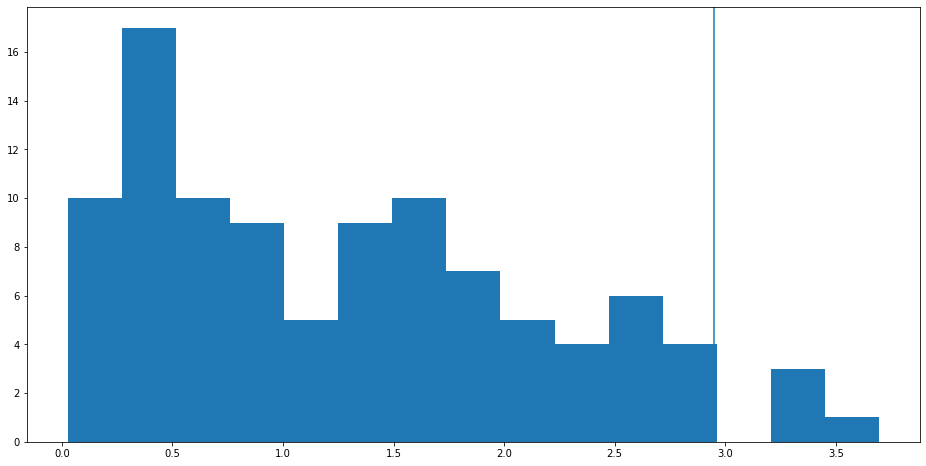

In [ ]:
plt.figure(1, figsize=(16,8));
plt.hist(diff, bins=15);
plt.axvline(x=ground_truth);

## Normal distribution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [ ]:
mu = 0
var = 1
def normal_pdf(mu, var):
  sigma = np.math.sqrt(var)
  x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red');

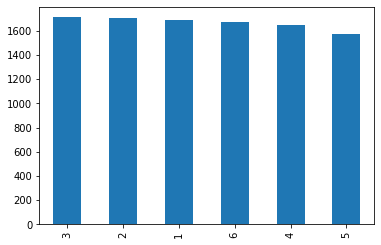

In [ ]:
# permainan lempar dadu
dadu = np.random.randint(1, 7, 10000)
dadu = pd.Series(dadu)
dadu.value_counts().plot(kind='bar');

### central limit theorem

In [ ]:
# repetisi + rata2
rerata = []
for i in range(5000):
  dadu = np.random.randint(1, 7, 1000)
  dadu = dadu / 6
  rerata.append(dadu.mean())

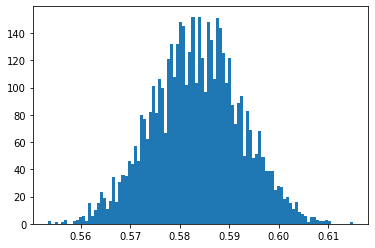

In [ ]:
plt.hist(rerata, bins=100);

In [ ]:
xbar = np.mean(rerata)
var = np.var(rerata)
print(xbar, var)

0.583512 8.0053856e-05


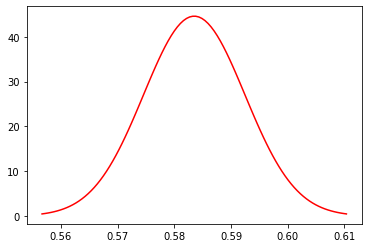

In [ ]:
normal_pdf(xbar, var)
